<a href="https://colab.research.google.com/github/Karthiga-BM/Data_Analysis_And_Machine_Learning_Projects/blob/master/data_cleaning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**  **Python** **Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

**Uploading** **the** **dataset**

In [99]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


**Data Cleaning & Analysis**

In [101]:
df = pd.read_csv(
    "Dataset.csv", 
    index_col='Date', # dates parsed as index
    parse_dates=True, 
    dayfirst=True # DD/MM formatting
                )
df = df.asfreq('B') # B for Business calendar (no weekends) 
df = df.fillna(method='ffill') # fills any missing day's data with previous day's
closing_prices = df.Close # takes column labelled 'Close'


In [102]:
display(df)

Signal        Open  ...       Close   Adj Close
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  116.059998  108.281601
2015-11-20  13.608819  116.480003  ...  116.809998  108.981323
2015-11-23  12.990589  116.709999  ...  117.389999  109.522453
2015-11-24  12.667435  116.879997  ...  118.250000  110.324837
2015-11-25  13.019910  118.300003  ...  119.169998  111.183159
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  165.669998  163.851135
2020-05-27   0.000000  165.080002  ...  165.669998  163.851135
2020-05-28   0.000000  165.080002  ...  165.669998  163.851135
2020-05-29   0.000000  165.080002  ...  165.669998  163.851135
2020-06-01   0.000000  163.850006  ...  165.350006  163.534668

[1183 rows x 6 columns]

**Moving Averages:**

**Moving Averages**  Moving Averages (MA) help to smooth out stock prices on a chart by filtering out short-term price fluctuations. We calculate moving averages over a defined period of time e.g. last 9, 50 or 200 days. There are two (most common) averages used in technical analysis which are:

 **Simple Moving Average** - a simple average calculated over last N days e.g. 50, 100 or 200,
Exponential Moving Average (EMA) - an average where greater weights are applied to recent prices.
SMA lag the original price, which means that changes in the trend are only seen with a delay of L days. How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly around M/2 days. Thus, if we are using a 50 days SMA, this means we may be late by almost 25 days, which can significantly affect our strategy.
One way to reduce the lag induced by the use of the SMA is to use Exponential Moving Average(EMA). Exponential moving averages give more weight to the most recent periods. This makes them more reliable than SMAs as they are comparatively better representation of the recent performance of the asset
So in this analysis, Exponential Moving Average(EMA) is used to caluclate the  signal line value..

**Calculating 20 day EMA**





In [103]:
df['20_EMA'] = df['Close'].ewm(span = 20, adjust = False).mean()
print(df.head)

<bound method NDFrame.head of                Signal        Open  ...   Adj Close      20_EMA
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  108.281601  116.059998
2015-11-20  13.608819  116.480003  ...  108.981323  116.131427
2015-11-23  12.990589  116.709999  ...  109.522453  116.251291
2015-11-24  12.667435  116.879997  ...  110.324837  116.441644
2015-11-25  13.019910  118.300003  ...  111.183159  116.701487
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  163.851135  165.669943
2020-05-27   0.000000  165.080002  ...  163.851135  165.669948
2020-05-28   0.000000  165.080002  ...  163.851135  165.669953
2020-05-29   0.000000  165.080002  ...  163.851135  165.669957
2020-06-01   0.000000  163.850006  ...  163.534668  165.639486

[1183 rows x 7 columns]>


In [104]:
display(df)

Signal        Open  ...   Adj Close      20_EMA
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  108.281601  116.059998
2015-11-20  13.608819  116.480003  ...  108.981323  116.131427
2015-11-23  12.990589  116.709999  ...  109.522453  116.251291
2015-11-24  12.667435  116.879997  ...  110.324837  116.441644
2015-11-25  13.019910  118.300003  ...  111.183159  116.701487
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  163.851135  165.669943
2020-05-27   0.000000  165.080002  ...  163.851135  165.669948
2020-05-28   0.000000  165.080002  ...  163.851135  165.669953
2020-05-29   0.000000  165.080002  ...  163.851135  165.669957
2020-06-01   0.000000  163.850006  ...  163.534668  165.639486

[1183 rows x 7 columns]

In [84]:
df['EMA_20'] = df['Close'].ewm(span=20, adjust = False).mean()

In [85]:
display(df)

Signal        Open  ...      20_EMA      EMA_20
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  116.059998  116.059998
2015-11-20  13.608819  116.480003  ...  116.131427  116.131427
2015-11-23  12.990589  116.709999  ...  116.251291  116.251291
2015-11-24  12.667435  116.879997  ...  116.441644  116.441644
2015-11-25  13.019910  118.300003  ...  116.701487  116.701487
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  165.669943  165.669943
2020-05-27   0.000000  165.080002  ...  165.669948  165.669948
2020-05-28   0.000000  165.080002  ...  165.669953  165.669953
2020-05-29   0.000000  165.080002  ...  165.669957  165.669957
2020-06-01   0.000000  163.850006  ...  165.639486  165.639486

[1183 rows x 8 columns]

In [ ]:
df['EMA_12'] = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())


**Calculating** **50** **day** **EMA**

In [34]:
df['50_EMA'] = df['Close'].ewm(span = 50, adjust = False).mean()
print(df.head)

<bound method NDFrame.head of                Signal        Open  ...      20_EMA      50_EMA
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  116.059998  116.059998
2015-11-20  13.608819  116.480003  ...  116.131427  116.089410
2015-11-23  12.990589  116.709999  ...  116.251291  116.140413
2015-11-24  12.667435  116.879997  ...  116.441644  116.223142
2015-11-25  13.019910  118.300003  ...  116.701487  116.338705
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  165.669943  165.587771
2020-05-27   0.000000  165.080002  ...  165.669948  165.590995
2020-05-28   0.000000  165.080002  ...  165.669953  165.594094
2020-05-29   0.000000  165.080002  ...  165.669957  165.597070
2020-06-01   0.000000  163.850006  ...  165.639486  165.587381

[1183 rows x 8 columns]>


In [35]:
display(df)

Signal        Open  ...      20_EMA      50_EMA
Date                               ...                        
2015-11-19  13.768540  116.440002  ...  116.059998  116.059998
2015-11-20  13.608819  116.480003  ...  116.131427  116.089410
2015-11-23  12.990589  116.709999  ...  116.251291  116.140413
2015-11-24  12.667435  116.879997  ...  116.441644  116.223142
2015-11-25  13.019910  118.300003  ...  116.701487  116.338705
...               ...         ...  ...         ...         ...
2020-05-26   0.000000  165.080002  ...  165.669943  165.587771
2020-05-27   0.000000  165.080002  ...  165.669948  165.590995
2020-05-28   0.000000  165.080002  ...  165.669953  165.594094
2020-05-29   0.000000  165.080002  ...  165.669957  165.597070
2020-06-01   0.000000  163.850006  ...  165.639486  165.587381

[1183 rows x 8 columns]

Executing the class to find the calculated signal value:


In [72]:
#Setting up the class:
class calculate_moving_average():
    def __init__(self, close_price):
        self.data = pd.DataFrame(close_price) 

    def EMA(self, averaging_length=50):
        ret = self.data.ewm(
            span=averaging_length, 
            adjust=False).mean()
        return ret.rename(columns={'Close': 'EMA'})

    def MACD(self, a=12, b=26, c=9):
        MACD_line = self.EMA(a) - self.EMA(b)
        signal_line = MACD_line.ewm(span=c, adjust=False).mean()
        return MACD_line, signal_line


In [60]:

#Execute the class:
MACD_indicator = calculate_moving_average(close_price)
MACD_line, signal_line = MACD_indicator.MACD()
signal_line = signal_line 

#create calculated_signal value column in our dataframe:
df['calculated_signal_line'] = signal_line
df['MACD_line'] = MACD_line
df['EMA_12'] = 
df['EMA_20'] =
print(df.head)

<bound method NDFrame.head of                Signal        Open  ...  calculated_signal_line  MACD_line
Date                               ...                                   
2015-11-19  13.768540  116.440002  ...                0.000000   0.000000
2015-11-20  13.608819  116.480003  ...                0.011966   0.059829
2015-11-23  12.990589  116.709999  ...                0.040031   0.152290
2015-11-24  12.667435  116.879997  ...                0.090344   0.291599
2015-11-25  13.019910  118.300003  ...                0.166438   0.470812
...               ...         ...  ...                     ...        ...
2020-05-26   0.000000  165.080002  ...                0.001319   0.000897
2020-05-27   0.000000  165.080002  ...                0.001221   0.000830
2020-05-28   0.000000  165.080002  ...                0.001130   0.000769
2020-05-29   0.000000  165.080002  ...                0.001047   0.000712
2020-06-01   0.000000  163.850006  ...               -0.004136  -0.024867

[1183 r

In [61]:
display(df)

Signal        Open  ...  calculated_signal_line  MACD_line
Date                               ...                                   
2015-11-19  13.768540  116.440002  ...                0.000000   0.000000
2015-11-20  13.608819  116.480003  ...                0.011966   0.059829
2015-11-23  12.990589  116.709999  ...                0.040031   0.152290
2015-11-24  12.667435  116.879997  ...                0.090344   0.291599
2015-11-25  13.019910  118.300003  ...                0.166438   0.470812
...               ...         ...  ...                     ...        ...
2020-05-26   0.000000  165.080002  ...                0.001319   0.000897
2020-05-27   0.000000  165.080002  ...                0.001221   0.000830
2020-05-28   0.000000  165.080002  ...                0.001130   0.000769
2020-05-29   0.000000  165.080002  ...                0.001047   0.000712
2020-06-01   0.000000  163.850006  ...               -0.004136  -0.024867

[1183 rows x 10 columns]

In [55]:
%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Plotting 20 EMA, 50 EMA, Close price


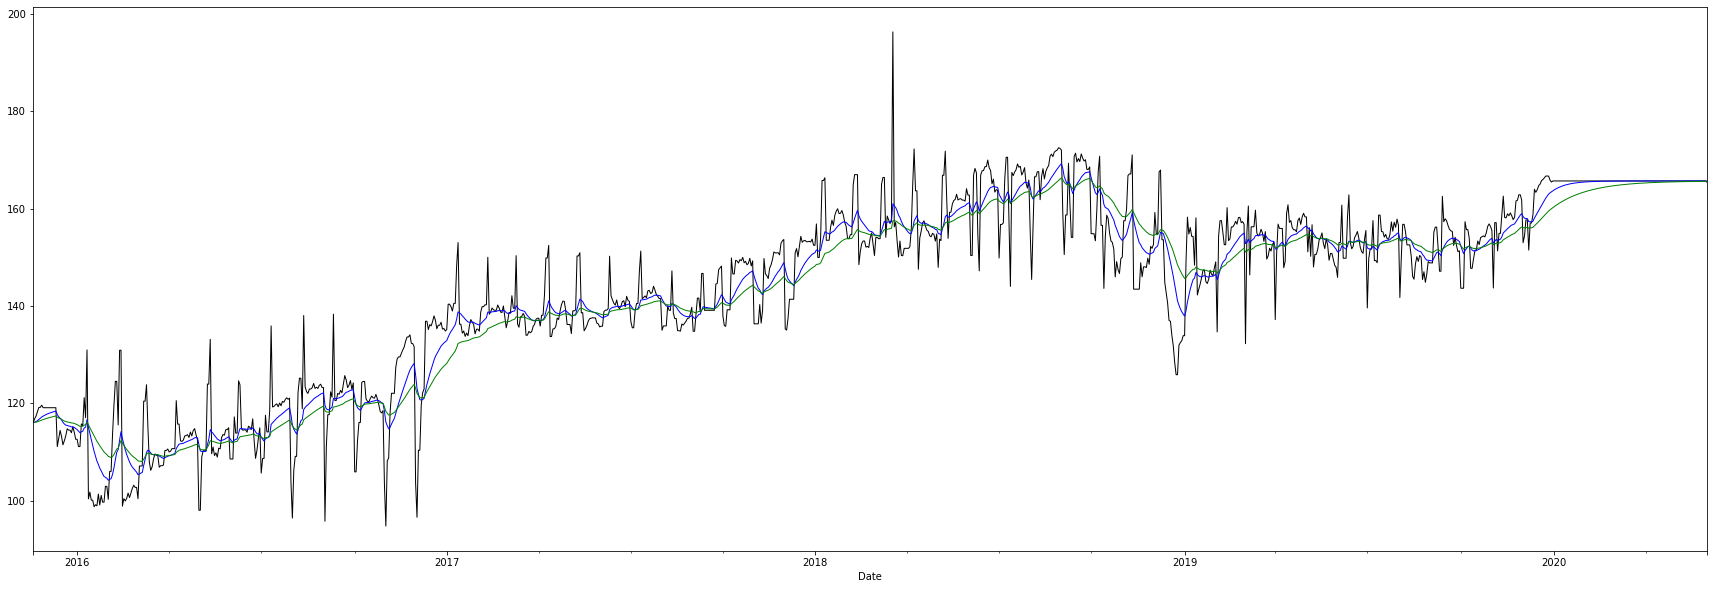

In [62]:
plt.figure(figsize = (30,10))

df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')


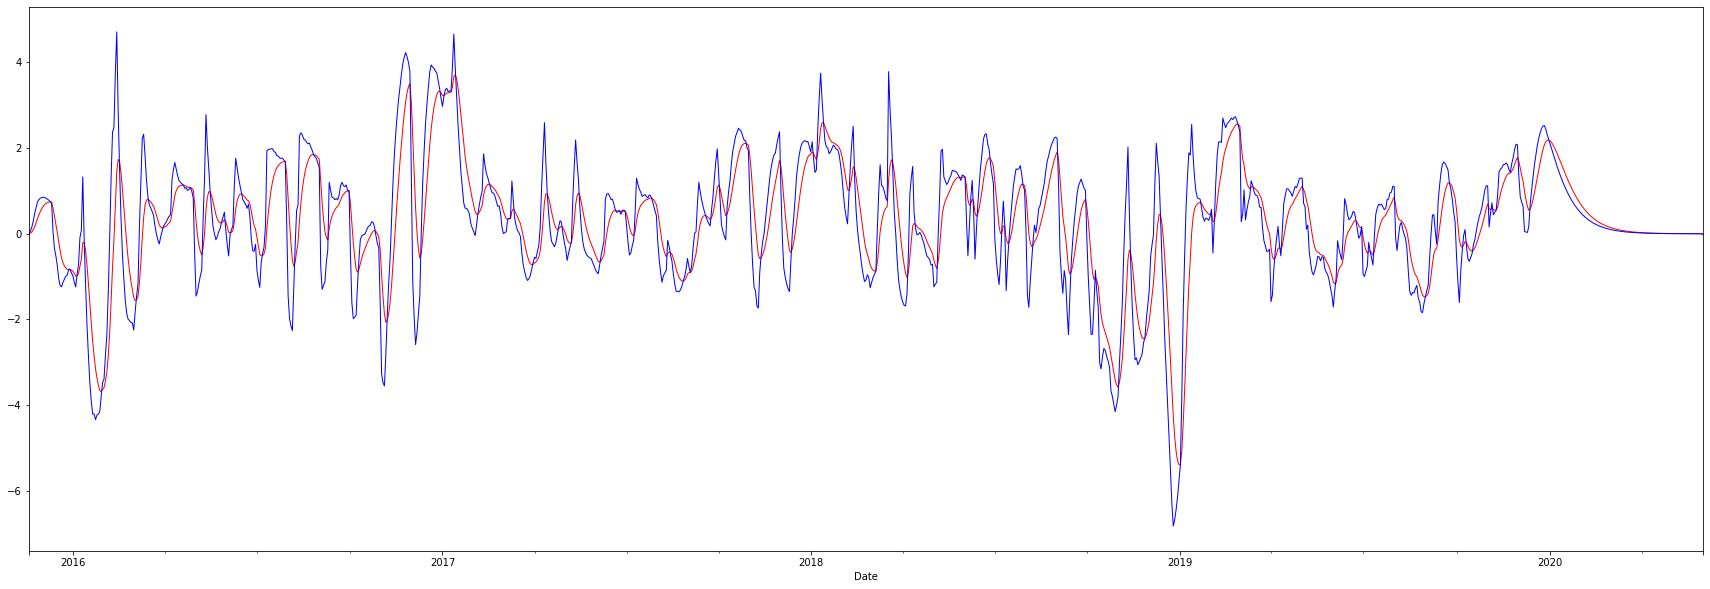

In [63]:
plt.figure(figsize = (30,10))

df['calculated_signal_line'].plot(color = 'r' ,lw = 1, label = 'calculated_signal_line')
df['MACD_line'].plot(color = 'b' ,lw = 1, label = 'MACD_line')